This notebook implements the Hodrick-Prescott filter, using U.S. data on real GDP

Given the log of some variable $X_t$, the HP filter computes the trend $\hat X_t$ as 
$$
\min_{\{\hat X_t\}_{t=1}^T}\; \sum_{t=1}^T \underbrace{\left(X_t-\hat X_t\right)^2 }_{\text{Distance trend and actual variable}}
+ \lambda \sum_{t=2}^{T-1} \underbrace{\left[\left(\hat X_{t+1}-\hat X_t\right) - \left(\hat X_{t}-\hat X_{t-1}\right)\right]^2}_{\text{Change in trend's growth rate}}
$$

The cyclical component is $\tilde X_t = X_t - \hat X_t$.

In [62]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})

In [59]:
# Y https://fred.stlouisfed.org/series/GDPC1
# C https://fred.stlouisfed.org/series/PCECC96
# I https://fred.stlouisfed.org/series/GPDIC1
# E https://fred.stlouisfed.org/series/PAYEMS

path = 'C:/Users/danie/Documents/teaching/economics_master/master_2022_SS/04_business_cycles/12_business_cycle_facts/'

real_gdp = pd.read_csv(path + 'GDPC1.csv',index_col=0)
real_gdp.index = pd.to_datetime(real_gdp.index)
date_index = real_gdp.index

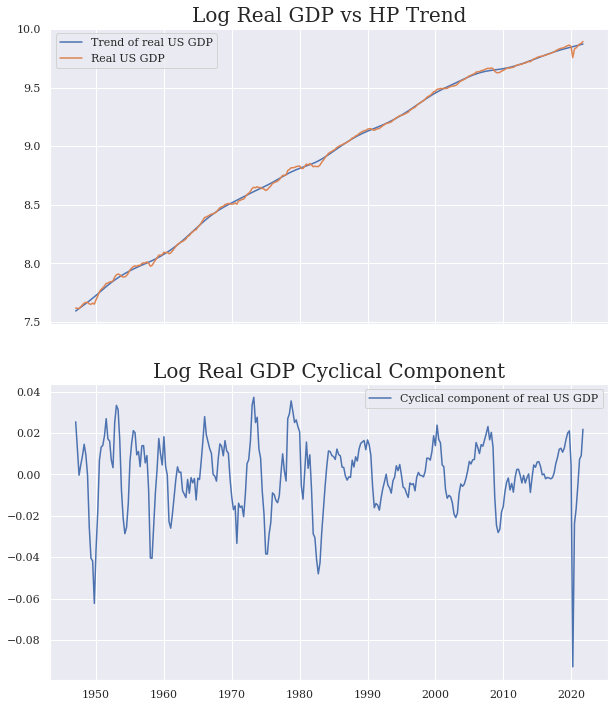

In [61]:
# Store the cycle and the trend
log_real_gdp = np.log(real_gdp['GDPC1']).values
cycle, trend = sm.tsa.filters.hpfilter(log_real_gdp, lamb=1600)

fig, ax = plt.subplots(2, 1, sharex=True, figsize=(10, 12))

ax[0].plot(date_index, trend, lw=1.5)
ax[0].plot(date_index, log_real_gdp, lw=1.5)

ax[1].plot(date_index, cycle)

ax[0].set_title('Log Real GDP vs HP Trend',size = 20)
ax[0].legend(['Trend of real US GDP','Real US GDP'])

ax[1].set_title('Log Real GDP Cyclical Component',size = 20)
ax[1].legend(['Cyclical component of real US GDP'])
plt.show()